In [39]:
import numpy as np
import pandas as pd
import librosa
import librosa.display as dp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import os


In [40]:
# Função para processar arquivos de áudio
def process_audio(file_path, sr=None):
    y, sr = librosa.load(file_path, sr=sr, mono=True)
    S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
    S = np.abs(S)
    
    max_indices = np.argwhere(S == np.max(S, axis=0))
    times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
    frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]
    
    return pd.DataFrame({'Frequencia': frequencies, 'Tempo': times})

In [74]:
# Lista de arquivos de áudio e alvos
audio_files = [
    ("./musics/musics_wav/assovio.wav", 0),
    ("./musics/musics_wav/joao_assovio.wav", 1),
    ("./musics/musics_wav/dido.wav", 2),
    ("./musics/musics_wav/moli_assovio_2.wav", 3),
    ("./musics/musics_wav/ratos.wav", 4),
    ("./musics/musics_wav/ratos_cover.wav", 5)
]

In [54]:
# Processar todos os arquivos de áudio
dataframes = []
for file_path, target in audio_files:
    df = process_audio(file_path)
    df['target'] = target
    dataframes.append(df)

In [55]:
# Concatenar todos os dados
dataset = pd.concat(dataframes, ignore_index=True)
X = dataset[['Frequencia', 'Tempo']]
y = dataset['target']

In [56]:
# Escalonamento e divisão dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [58]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
y_pred = knn_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8966238135287757
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.59      0.61        90
           1       0.64      0.70      0.67        83
           2       0.76      0.79      0.77      8628
           3       0.64      0.38      0.47        61
           4       0.99      0.99      0.99     30087
           5       0.29      0.28      0.28      2666

    accuracy                           0.90     41615
   macro avg       0.66      0.62      0.63     41615
weighted avg       0.90      0.90      0.90     41615



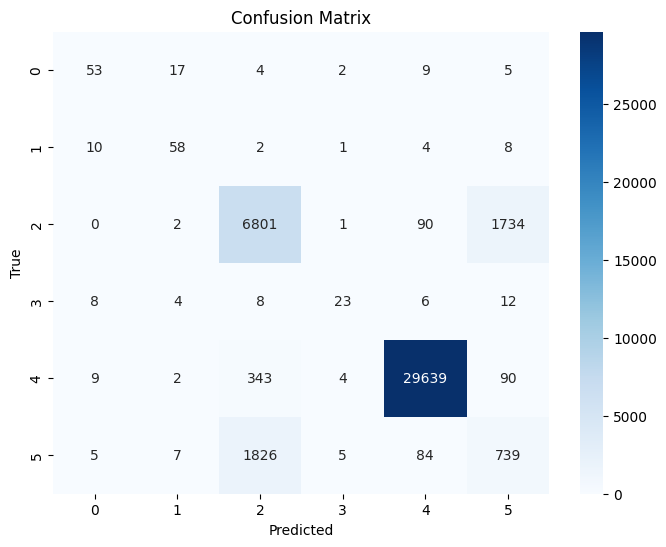

In [60]:
# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import joblib

# Salvar o modelo treinado
joblib.dump(knn_model, 'knn_model.pkl')
# Salvar o scaler
joblib.dump(scaler, 'scaler.pkl')
print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


In [62]:
# Carregar o modelo salvo
loaded_model = joblib.load('knn_model.pkl')
# Carregar o scaler
loaded_scaler = joblib.load('scaler.pkl')
print("Modelo carregado com sucesso!")

Modelo carregado com sucesso!


In [63]:
import librosa
import numpy as np

def extract_features(audio_path):
    # Carregar a música
    y, sr = librosa.load(audio_path, sr=None)

    # Extrair a frequência média (centroide espectral)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    avg_frequency = np.mean(spectral_centroid)

    # Extrair a duração total da música
    duration = librosa.get_duration(y=y, sr=sr)

    return [avg_frequency, duration]


In [77]:
import joblib

# Carregar o modelo e o scaler
loaded_model = joblib.load('knn_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Extrair características da música
audio_path = './musics/musics_wav/ratos_cover.wav'  # Caminho para o arquivo de áudio
features = extract_features(audio_path)

# Escalar as características
features_scaled = loaded_scaler.transform([features])

# Fazer a previsão
prediction = loaded_model.predict(features_scaled)

print(f"A música foi classificada como: {prediction[0]}")


A música foi classificada como: 4


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
